# Preface 

In practice, implementing a machine learning algorithm with code is trivial - a few lines of code is all that's needed. What is more time-consuming is the other steps: framing our problem, validating our results, optimising our model, and thinking of additional features to engineer. In other words, machine learning involves more than just algorithms. It's a process with many steps.    

Here, we will walk through the whole modelling process, from understanding our problem in machine learning terms, to learning about our model, then fitting and evaluating how well our model performs. 

For modelling, our tool is Python's Sci-kit Learn library, which provides many functions that make building good models easy. 

# Framing the Problem 

- We have an output variable we want to predict - HDB resale price 
- To predict this output, we have a few features to take into account: median_age, town_age, etc. These features will be the inputs to our model. 
- Examining our data, we see that our output variable is continuous. Our input variables are also continuous. 
- These characteristics suggest that Linear Regression, part of a family of linear models, would be a good model to use. 

# Linear Regression 

## Intuition behind the algorithm

- Predict dependent variable (y) from independent variable (x) using a line of best fit 

          y = xb + c

## Measure of accuracy 

- Root Mean Squared Error (RMSE)
Difference between the value predicted by the model and the observed values. A large RMSE means our model does not fit the observed values well.  

- R-squared value
Variability in the dataset that our model accounts for. An R-squared value close to 1 shows that our model explains a large proportion of the variability in our data

![alt text](LinearRegressionLine.png)

##  Assumptions

Thus far we have viewed our model as a black box. Input goes in, and output comes out. The reality is that all models make assumptions about data, and only when these assumptions are met can we be certain that our results are robust. 

For linear regression, some examples of assumptions are that our inputs and outputs have a normal distribution, and that the spread of the data (variance) is similar. Our model will be more robust to violations in assumptions with more data. However, with small data, we have to be careful 

So it's always worth checking that the data meets the model assumptions, and adjusting accordingly. 

Solutions include transforming our data to fit a normal distribution, or rescaling the data so that the variables have similar distributions. We can also use a different model. 

# Introduction to Sci-Kit Learn Estimator API 

To implement our Linear Regression Model in Sklearn, we go through the following: 

1. Split our data into a training set and a test set. 
2. Instantiate our model from the library
3. Choose our hyperparameters
4. Fit our model to the training data
5. Test our model on new data
6. Optimise our model by finding the best set of hyperparameters

# Examples Covered: 

## 2. Applying Linear Regression to the Boston House Price Dataset 

## 3. Applying Linear Regression to our Real World Dataset 

## 4. Comparing Boston and Singapore Housing datasets 

# Boston Dataset 

In [72]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import sklearn 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [73]:
from sklearn.datasets import load_boston
boston = load_boston()

In [74]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [75]:
# sklearn boston dataset is a dictionary so explore keys of dictionary 
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [76]:
# convert data values into data frame to make it easier to work with 
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [77]:
# replace column names with feature names 
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [78]:
# target contains the housing prices 
boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [79]:
# add price to the bos data frame 
price = boston.target

In [80]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()

View functions inside Linear Regression Object lm<tab>

## Train-test Split

In [81]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(bos, price, test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [89]:
lm.fit(X_train, Y_train)
lm.coef_

array([ -1.23914398e-01,   5.36390900e-02,   1.70058904e-02,
         2.85026843e+00,  -1.69036368e+01,   3.83027585e+00,
        -4.70144752e-03,  -1.49216306e+00,   3.27962741e-01,
        -1.27387399e-02,  -8.90282212e-01,   9.82252706e-03,
        -5.56195018e-01])

In [90]:
lm.residues_

/home/jeanne/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


8810.685528835591

In [91]:
lm.intercept_

35.369620661391878

## Exploring Data Further 

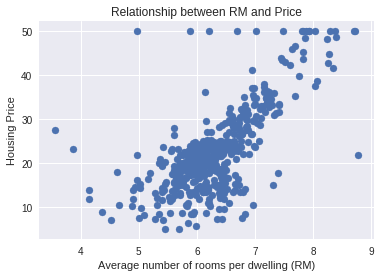

In [85]:
plt.scatter(bos.RM, price)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

- Clean data some more? 
- Interaction between variables? 
- Tweak parameters? 
- Outliers
- Autocorrelation 

# Model Validation 

In [92]:
# k-fold cross-validation 
# use cross_val_score helper function on estimator and dataset 

from sklearn.model_selection import cross_val_score 
lm = LinearRegression()
scores = cross_val_score(lm, boston.data, boston.target, cv=5)
scores

array([ 0.63861069,  0.71334432,  0.58645134,  0.07842495, -0.26312455])

In [93]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.35 (+/- 0.76)


see documentation for more complex ways to cross-validate 

# Measuring Accuracy

In [ ]:
lm.fit(X_train, Y_train)
y_pred = lm.predict(X_test)

In [97]:
lm.score(X_train, Y_train)

0.73574120389640607

In [95]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(Y_test, y_pred)

18.479916759570113

# Apply to our data

# Load Data 

In [99]:
HDB_2013 = pd.read_csv("HDB_2013.csv")
HDB_2013.head()

,Town,town_age,household_size,hdb_number,elderly_pop,median_age,pop_size,num_sec,num_pri,ave_price
0,Punggol,6.0,3,27814,4517,33,94829,3,9,523625.0
1,Sengkang,8.1,4,49131,8802,35172,748,6,11,542672.0
2,Sembawang,8.7,4,18402,2842,33,68055,2,5,489050.0
3,Bishan,21.2,3,19582,8693,44,62456,8,4,584800.0
4,Bukit_Batok,20.6,4,31673,10232,39,108197,6,6,433980.0


# Drop Non-numerical Column

In [100]:
HDB_2013 = HDB_2013.drop(HDB_2013.columns[[0]], axis=1)
HDB_2013.columns.values

array(['town_age', 'household_size', 'hdb_number', 'elderly_pop',
       'median_age', 'pop_size', 'num_sec', 'num_pri', 'ave_price '], dtype=object)

In [101]:
from sklearn.preprocessing import Imputer 
imp = Imputer(missing_values='NaN', strategy='mean',axis=0)
imp.fit(HDB_2013.iloc[:,8:])
HDB_2013.iloc[:,8:] = imp.transform(HDB_2013.iloc[:,8:])

In [102]:
HDB_2013.iloc[:,8:]

,ave_price
0,523625.000000
1,542672.000000
2,489050.000000
3,584800.000000
4,433980.000000
5,487263.000000
6,491805.782609
7,464512.000000
8,481714.000000
9,443063.000000


# Train/Test Split 

In [103]:
features = HDB_2013.iloc[:,0:8]
features.columns.values

array(['town_age', 'household_size', 'hdb_number', 'elderly_pop',
       'median_age', 'pop_size', 'num_sec', 'num_pri'], dtype=object)

In [104]:
price = HDB_2013.iloc[:,8:]

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, price, test_size=0.25)

# Instantiate Model 

In [106]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()

# Train Model 

In [107]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Run Prediction

In [108]:
y_pred = lm.predict(X_test)

# Assess Accuracy 

In [110]:
lm.score(X_train, Y_train)

0.58906351251820244

In [111]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(Y_test, y_pred)

1409496158338548.5

In [ ]:
## add more data from clean_resale 